## AR models: Random Walk

A **random walk** is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers. An elementary example of a random walk is the random walk on the integer number line, 
${\displaystyle \mathbb {Z} } $
, which starts at 0 and at each step moves +1 or −1 with equal probability.
https://en.wikipedia.org/wiki/Random_walk



Random walk process is defined as:
y(t) = $\beta_0 + \beta_1 X_{t-1}$ + $\epsilon_t$

where 
* y(t) is the next value in the series.
* $\beta_0$ is a coefficient that if set to a value other than zero adds a constant to the drift to the random walk.
* $\beta_1$ is a coefficient to weight the previous time step and is set to 1.
* $X_{t-1}$ is the observtion at the previous time step.
* $\epsilon_t$ is the white noise or random fluctuation at that time.


##  Random Walk and Autocorrelation

##### We calculate the correlation between each observation and the observations at previous time steps. 

##### Autocorrelation plot or a correlogram plot is a plot of these correlations. 

##### We expect a strong auto-correlation with the previous observation and a linear fall oﬀ from there with previous lag values.

### Random Walk and Stationarity

###### When the values of Time series data are not a function of time, we have a stationary time series.

######  We know that the observations in a random walk are dependent on time. The current observation is a random step from the previous observation.

######  Not all non-stationary time series are random walks and  a non-stationary time series does not have a consistent mean and/or variance over time. 

######  We conﬁrm non-stationary property of random walk using a statistical signiﬁcance test, speciﬁcally the Augmented Dickey-Fuller test

### Predicting a Random Walk

###### A random walk is cannot reasonably be predicted. 

######  We expect that the best prediction would be to use the observation at the previous time step as what will happen in the next time step.  We know that in the random walk, the next time step will be a function of the prior time step. This is  called the naive forecast, or a persistence model.

### Example 1 

In our examples, we use the same seed for the random number generator to ensure that we get the same random walk.

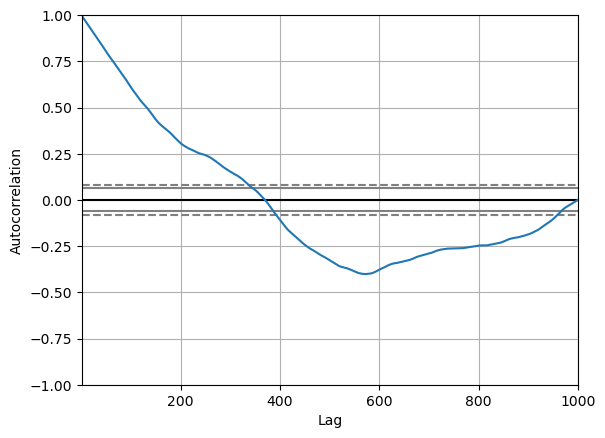

ADF Statistic: 0.341605
p-value: 0.979175
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


Predicting a Random Walk 
 RMSE: 1.000


In [1]:
# plot the autocorrelation of a random walk 

import pandas                    as      pd
import numpy                     as      np
from   random                    import  seed, random 
import matplotlib.pyplot         as      plt
from   sklearn.metrics           import  mean_squared_error
from   statsmodels.tsa.stattools import  adfuller

seed(1) 
random_walk = list() 
random_walk.append(-1 if random() < 0.5 else 1) 

for i in range(1, 1000): 
    movement = -1 if random() < 0.5 else 1 
    value    = random_walk[i-1] + movement 
    random_walk.append(value) 
    
pd.plotting.autocorrelation_plot(random_walk) 
plt.show()

### Check stationary property

result = adfuller(random_walk) 

print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 
print('Critical Values:') 

for key, value in result[4].items(): 
    print('\t%s: %.3f' % (key, value))

# prepare dataset for predicting a random walk

training_size     = int(len(random_walk) * 0.70) 
training, test    = random_walk[0 : training_size], random_walk[training_size:]  

predictions       = list() 
hist              = training[-1] 

for i in range(len(test)): 
    yhat = hist 
    predictions.append(yhat) 
    hist = test[i] 
    
rmse = np.sqrt(mean_squared_error(test, predictions))  
print('\n\nPredicting a Random Walk \n RMSE: %.3f' % rmse)


### Inference

* We see a trend in the first 500 lag observations.
* We observe that the random walk is non-stationary since the p value > 0.05.
* We know the variation from one time step to the next is either -1 or 1 and we get RMSE as 1

## Random walk with drift

### Example 2

**Simulate stock returns using a random walk with drift**

Simulate Stock prices as follows:

* Generate a random walk with mean 0.0001 and standard deviation of 0.1. Add 1 for total return.
* Convert the total returns to get a starting value of 100.

Plot the simulated random walk with drift.

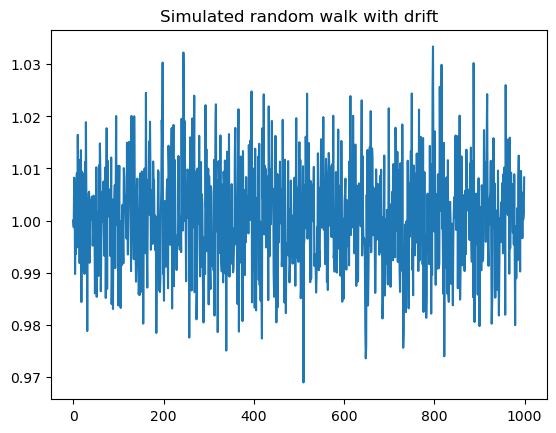

ADF Statistic: -1.450395
p-value: 0.557892
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


Predicting a Random Walk with drift 
RMSE: 1.000


In [2]:
import numpy               as np
from   random              import  seed, random 
import matplotlib.pyplot   as      plt

# Generate
seed(1234)
rw_steps  = np.random.normal(loc = 0.001, scale = 0.01, size = 1000) + 1

### Initialize first element to 1
rw_steps[0] = 1

### Simulate the stock price

Price = rw_steps * np.cumprod(rw_steps)
Price = Price * 100

### Plot the simulated stock prices
plt.plot(rw_steps)
plt.title("Simulated random walk with drift")
plt.show()

### Check stationary property

result = adfuller(Price) 

print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1]) 
print('Critical Values:') 

for key, value in result[4].items(): 
    print('\t%s: %.3f' % (key, value))
    
### Prediction

training_size     = int(len(Price) * 0.70) 
training, test    = random_walk[0 : training_size], random_walk[training_size:]  

predictions       = list() 
hist              = training[-1] 

for i in range(len(test)): 
    yhat = hist 
    predictions.append(yhat) 
    hist = test[i] 
    
rmse = np.sqrt(mean_squared_error(test, predictions))  
print('\n\nPredicting a Random Walk with drift \nRMSE: %.3f' % rmse)


### Inference

* We see a trend in the lag observations.
* We observe that the random walk is non-stationary since the p value > 0.05.
* We know the variation from one time step to the next is either -1 or 1 and we get RMSE as 1

## Auto ARIMA

* In an ARIMA model there are 3 parameters, namely p, q and d that help model major aspects of a time series: seasonality, trend and noise.

* If our model has a seasonal component, we use Seasonal ARIMA with parameters, P, Q and D related to seasonal components of the model.


https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c


### auto.arima

The module auto.arima fits the best ARIMA model to univariate time series according to either AIC, AICc or BIC value. This function conducts a search over possible model within the order constraints provided.

### AIC 

The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection. 

### AICc is AIC with a correction for small sample sizes. 

### BIC 

Bayesian information criterion (BIC) or Schwarz information criterion (also SIC, SBC, SBIC) is a criterion for model selection among a finite set of models; the model with the lowest BIC is preferred. It is based, in part, on the likelihood function and it is closely related to the Akaike information criterion (AIC). 

https://en.wikipedia.org/wiki/Akaike_information_criterion#Comparison_with_BIC
https://en.wikipedia.org/wiki/Bayesian_information_criterion

### Example 3

We use tractor sales data to replicate auto.arima in python.

In [3]:
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("TractorSales.csv")
data.head(5)

,Month-Year,Number of Tractor Sold
0,3-Jan,141
1,3-Feb,157
2,3-Mar,185
3,3-Apr,199
4,3-May,203


In [5]:
dates = pd.date_range(start='2003-01-01', freq='MS', periods=len(data))

In [6]:
import calendar
data['Month'] = dates.month
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x])
data['Year'] = dates.year

In [7]:
data.drop(['Month-Year'], axis=1, inplace=True)
data.rename(columns={'Number of Tractor Sold':'Tractor-Sales'}, inplace=True)
data = data[['Month', 'Year', 'Tractor-Sales']]

In [8]:
data.set_index(dates, inplace=True)

In [9]:
data.head(5)

,Month,Year,Tractor-Sales
2003-01-01,Jan,2003,141
2003-02-01,Feb,2003,157
2003-03-01,Mar,2003,185
2003-04-01,Apr,2003,199
2003-05-01,May,2003,203


In [10]:
# extract out the time-series
sales_ts = data['Tractor-Sales']

Text(0, 0.5, 'Tractor Sales')

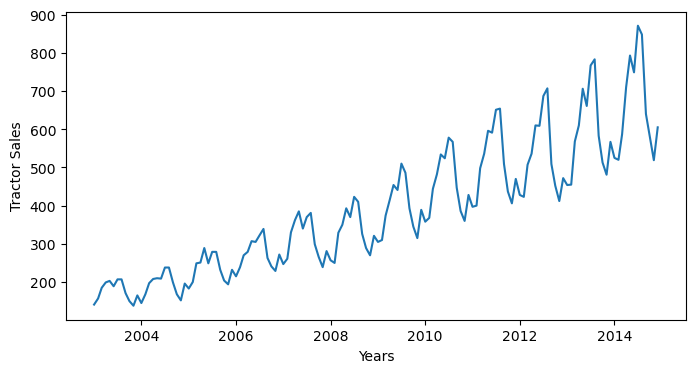

In [11]:
plt.figure(figsize=(8, 4))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Tractor Sales')

### Inference

We observe both trend and multiplicative seasonaliy from the plot shown above.

We try moving averages of various window widths such as 4, 6,8 and 12.

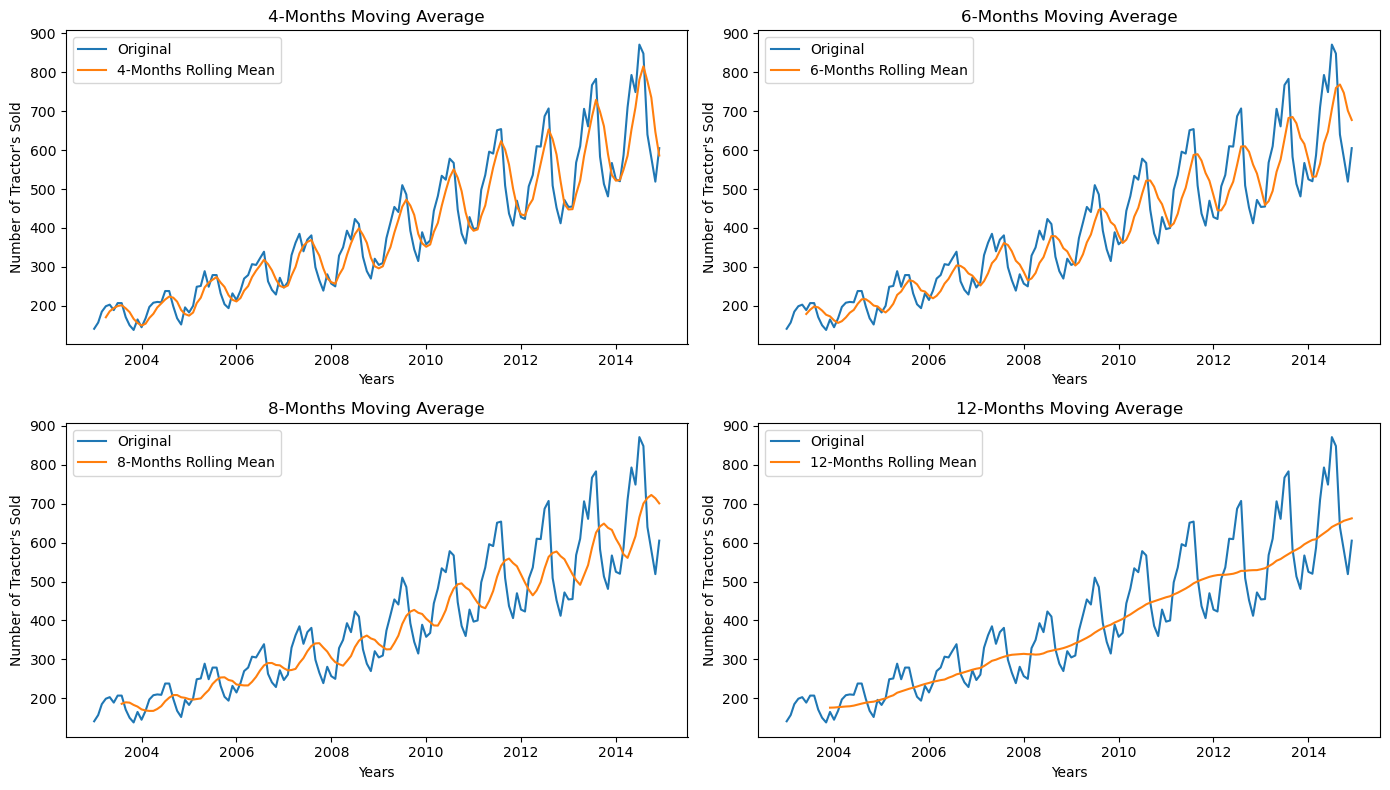

In [12]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)
axes[0][0].plot(sales_ts.index, sales_ts, label='Original')
axes[0][0].plot(sales_ts.index, sales_ts.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Number of Tractor's Sold")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')
axes[0][1].plot(sales_ts.index, sales_ts, label='Original')
axes[0][1].plot(sales_ts.index, sales_ts.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Number of Tractor's Sold")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')
axes[1][0].plot(sales_ts.index, sales_ts, label='Original')
axes[1][0].plot(sales_ts.index, sales_ts.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Tractor's Sold")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')
axes[1][1].plot(sales_ts.index, sales_ts, label='Original')
axes[1][1].plot(sales_ts.index, sales_ts.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Tractor's Sold")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')
plt.tight_layout()
plt.show()

In [13]:
#Determing rolling statistics

rolmean = sales_ts.rolling(window = 4).mean()
rolstd = sales_ts.rolling(window = 4).std()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

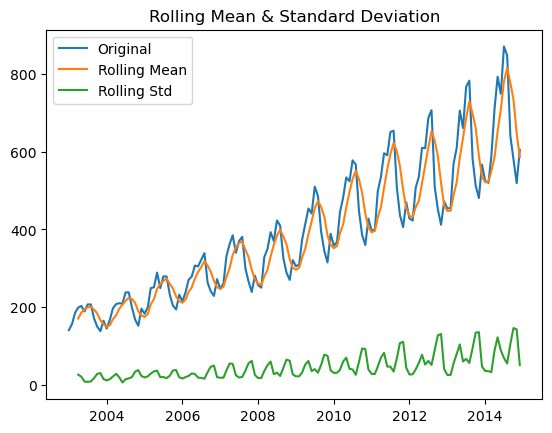

In [14]:
#Plot rolling statistics:
orig = plt.plot(sales_ts, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

Dickey-Fuller Test - Let's run the Dicky Fuller Test on the timeseries and verify the null hypothesis that the TS is non-stationary.

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
dftest = adfuller(sales_ts)
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is 1.109
DF test p-value is 0.9953


Though the variation in standard deviation is small, rolling mean is clearly increasing with time and this is not a stationary series. Also, the test statistic is way more than the critical values.

As we observed while plotting the moving average over months that there is a monhly pattern, now, let’s decipher the seasonal component.

### Seasonality – Time Series Decomposition

Observe how number of tractors sold vary on a month on month basis. We will plot a stacked annual plot to observe seasonality in our data.

In [17]:
monthly_sales_data = pd.pivot_table(data, values = "Tractor-Sales", columns = "Year", index = "Month")
monthly_sales_data

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Apr,199,208,251,279,362,350,414,482,536,536,610,710
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Dec,165,196,232,272,281,321,389,428,470,472,567,605
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Mar,185,197,249,270,330,329,374,444,498,507,568,587
May,203,210,289,307,385,393,454,534,596,610,706,793


In [18]:
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Mar,185,197,249,270,330,329,374,444,498,507,568,587
Apr,199,208,251,279,362,350,414,482,536,536,610,710
May,203,210,289,307,385,393,454,534,596,610,706,793
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Sep,171,199,232,263,299,326,393,447,509,509,583,640


<AxesSubplot:xlabel='Month'>

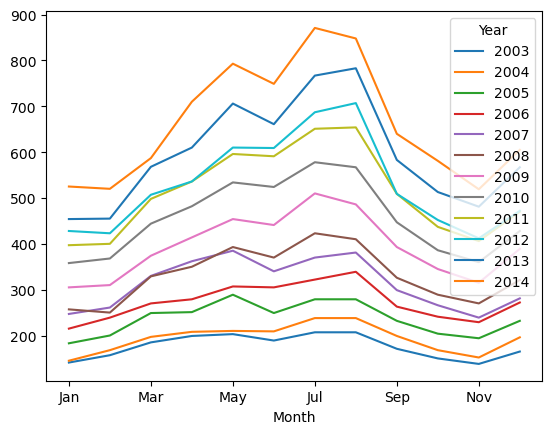

In [19]:
monthly_sales_data.plot()

In [20]:
yearly_sales_data = pd.pivot_table(data, values = "Tractor-Sales", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2003,141,157,185,199,203,189,207,207,171,150,138,165
2004,145,168,197,208,210,209,238,238,199,168,152,196
2005,183,200,249,251,289,249,279,279,232,204,194,232
2006,215,239,270,279,307,305,322,339,263,241,229,272
2007,247,261,330,362,385,340,370,381,299,266,239,281
2008,257,250,329,350,393,370,423,410,326,289,270,321
2009,305,310,374,414,454,441,510,486,393,345,315,389
2010,358,368,444,482,534,524,578,567,447,386,360,428
2011,397,400,498,536,596,591,651,654,509,437,406,470


<AxesSubplot:xlabel='Year'>

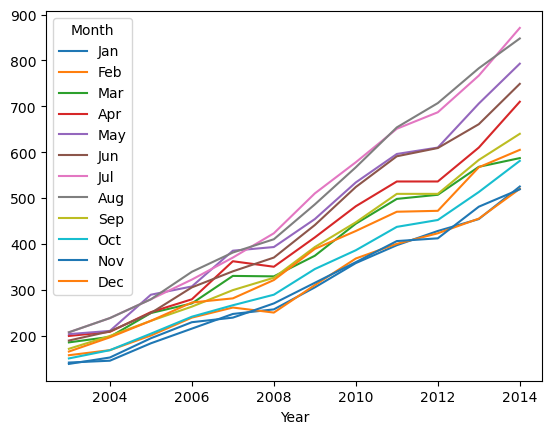

In [21]:
yearly_sales_data.plot()

<AxesSubplot:>

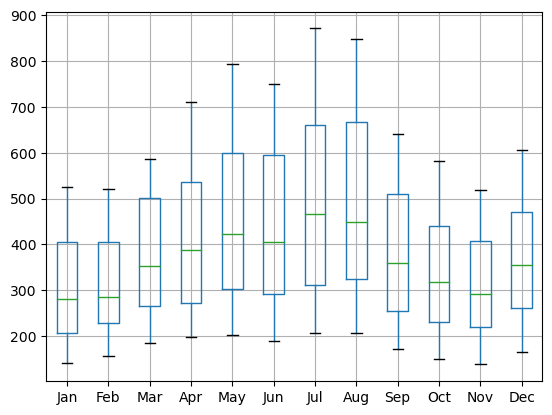

In [22]:
yearly_sales_data.boxplot()

### Inferences

The tractor sales have been increasing without fail every year.
July and August are the peak months for tractor sales and the variance and the mean value in July and August are also much higher than any of the other months.
We can see a seasonal cycle of 12 months where the mean value of each month starts with a increasing trend in the beginning of the year and drops down towards the end of the year. We can see a seasonal effect with a cycle of 12 months.

### Time Series Decomposition

In [23]:
decomposition = sm.tsa.seasonal_decompose(sales_ts, model='multiplicative')

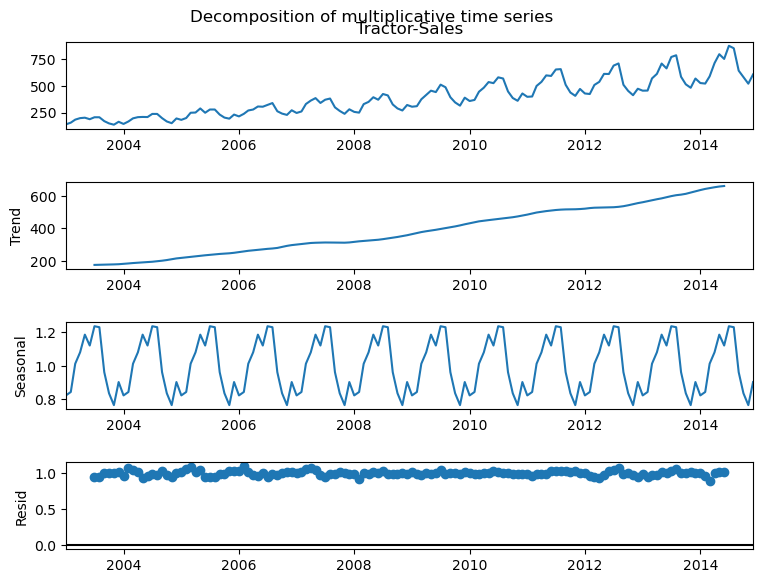

In [24]:
fig = decomposition.plot()
fig.set_figwidth(8)
fig.set_figheight(6)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

### Some of our key observations from this analysis:

1) Trend: 12-months moving average looks quite similar to a straight line hence we could have easily used linear regression to estimate the trend in this data.

2) Seasonality: Seasonal plot displays a fairly consistent month-on-month pattern. The monthly seasonal components are average values for a month after removal of trend. Trend is removed from the time series using the following formula:

Seasonality_t × Remainder_t = Y_t/Trend_t
 
3) Irregular Remainder (random): is the residual left in the series after removal of trend and seasonal components. Remainder is calculated using the following formula:

Remainder_t = Y_t / (Trend_t × Seasonality_t)

Text(0, 0.5, 'Tractor Sales')

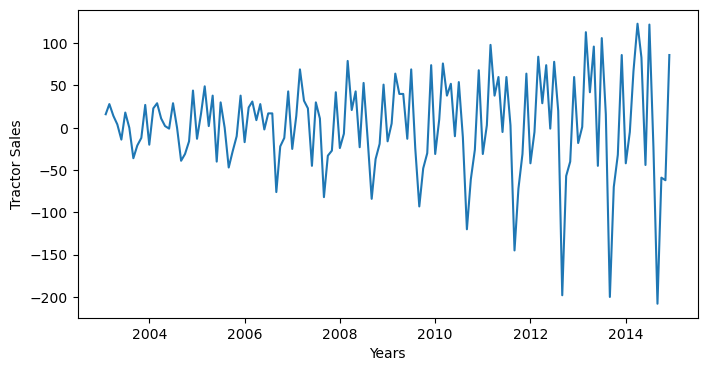

In [25]:
plt.figure(figsize=(8, 4))
plt.plot(sales_ts.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Tractor Sales')

We observe seasonality even after differencing.

Text(0, 0.5, 'Log (Tractor Sales)')

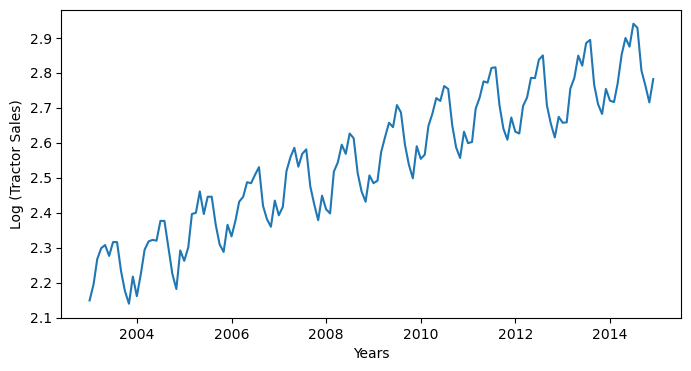

In [26]:
plt.figure(figsize=(8, 4))
plt.plot(np.log10(sales_ts))
plt.xlabel('Years')
plt.ylabel('Log (Tractor Sales)')

We observe trend and seasonality even after taking log of the observations.

Text(0, 0.5, 'Differenced Log (Tractor Sales)')

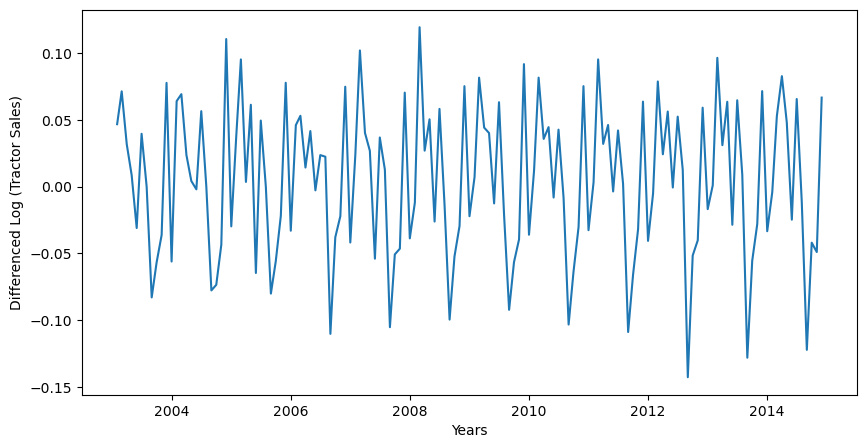

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(sales_ts).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Tractor Sales)')

In [28]:
sales_ts_log = np.log10(sales_ts)
sales_ts_log.dropna(inplace=True)

sales_ts_log_diff = sales_ts_log.diff(periods=1) # same as ts_log_diff = ts_log - ts_log.shift(periods=1)
sales_ts_log_diff.dropna(inplace=True)

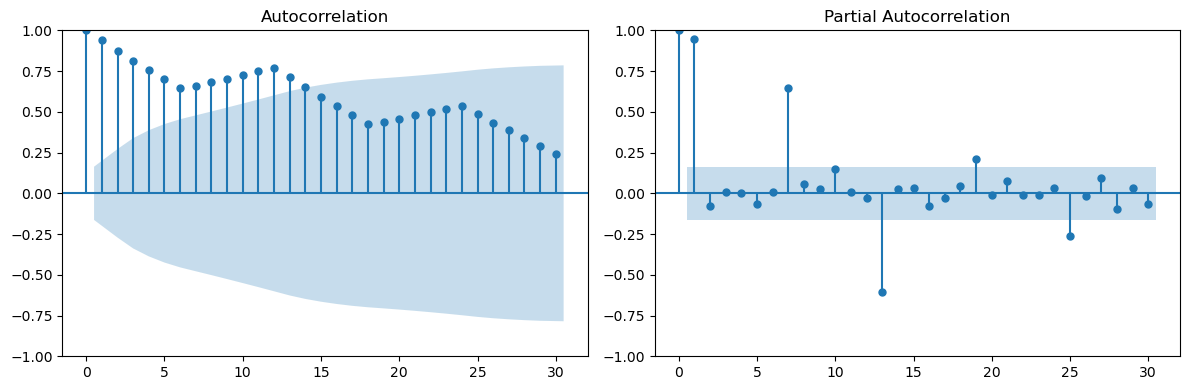

In [29]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_ts_log, lags=30, ax=axes[0])
smt.graphics.plot_pacf(sales_ts_log, lags=30, ax=axes[1])
plt.tight_layout()

Nonstationary series have an ACF that remains significant for half a dozen or more lags, rather than quickly declining to zero. You must difference such a series until it is stationary before you can identify the process

The above ACF is “decaying”, or decreasing, very slowly, and remains well above the significance range (blue band) for at least a dozen lags. This is indicative of a non-stationary series.

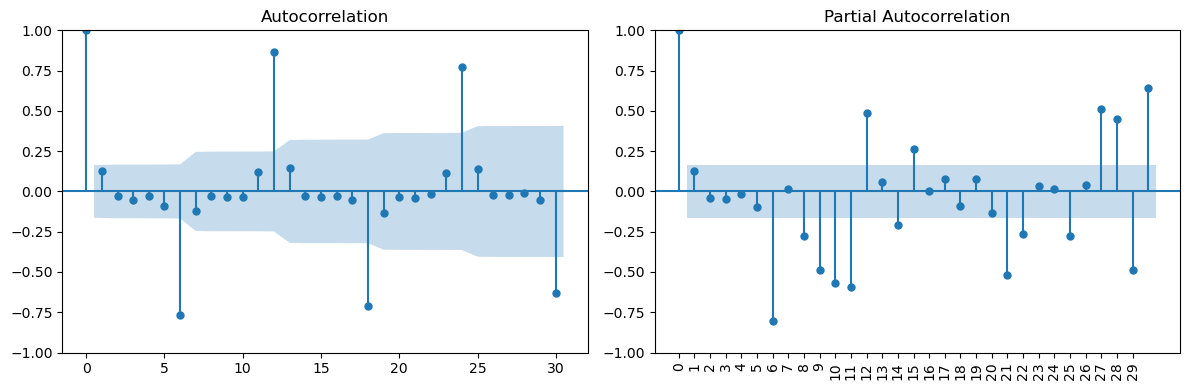

In [30]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
plt.xticks(range(0,30,1), rotation = 90)
smt.graphics.plot_acf(sales_ts_log_diff, lags=30, ax=axes[0])
smt.graphics.plot_pacf(sales_ts_log_diff, lags=30, ax=axes[1])
plt.tight_layout()

### Inference

The above ACF has “decayed” fast and remains within the significance range (blue band) except for a few (5) lags. This is indicative of a stationary series.

In [31]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [32]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [33]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [34]:
#Separate data into train and test
data['date'] = data.index
train = data[data.index < '2013-01-01']
test = data[data.index >= '2013-01-01']
train_sales_ts_log = np.log10(train['Tractor-Sales'])

In [35]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [36]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(train_sales_ts_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True)
            results = temp_model.fit()

            
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 0)x(1, 0, 1, 12)12 model - AIC:-599.5751383463811


### Inference

* The best fit model is selected based on Akaike Information Criterion (AIC) , and Bayesian Information Criterion (BIC) values. The idea is to choose a model with minimum AIC and BIC values.

For ARIMA(p, d, q) × (P, D, Q)S,
we got SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 model with the least AIC:-600.0908420381976

Here, 
* p = non-seasonal AR order = 0,
* d = non-seasonal differencing = 1,
* q = non-seasonal MA order = 1,
* P = seasonal AR order = 1,
* D = seasonal differencing = 0,
* Q = seasonal MA order = 1,
* S = time span of repeating seasonal pattern = 12


### Predict sales on in-sample date using the best fit ARIMA model


In [37]:
best_model = sm.tsa.statespace.SARIMAX(train_sales_ts_log,
                                      order=(0, 1, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

In [38]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                      Tractor-Sales   No. Observations:                  120
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 303.750
Date:                            Tue, 13 Dec 2022   AIC                           -599.499
Time:                                    16:22:32   BIC                           -588.383
Sample:                                01-01-2003   HQIC                          -594.985
                                     - 12-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2910      0.079     -3.672      0.000      -0.446      -0.136
ar.S.L12       0.9876      0.009   

In [39]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=True, full_results=True)

In [40]:
pred_dynamic_ci = pred_dynamic.conf_int()

In [41]:
pred99 = best_results.get_forecast(steps=24, alpha=0.1)

In [42]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy = test.copy()
testCopy['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [43]:
testCopy

,Month,Year,Tractor-Sales,date,sales_ts_forecasted
2013-01-01,Jan,2013,454,2013-01-01,438.272132
2013-02-01,Feb,2013,455,2013-02-01,439.020960
2013-03-01,Mar,2013,568,2013-03-01,531.034811
2013-04-01,Apr,2013,610,2013-04-01,566.647656
2013-05-01,May,2013,706,2013-05-01,634.565562
2013-06-01,Jun,2013,661,2013-06-01,627.611327
2013-07-01,Jul,2013,767,2013-07-01,700.526157
2013-08-01,Aug,2013,783,2013-08-01,707.639735
2013-09-01,Sep,2013,583,2013-09-01,535.742602
2013-10-01,Oct,2013,513,2013-10-01,471.341462


In [43]:
# Compute the root mean square error
mse = ((testCopy['Tractor-Sales'] - testCopy['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 70.802


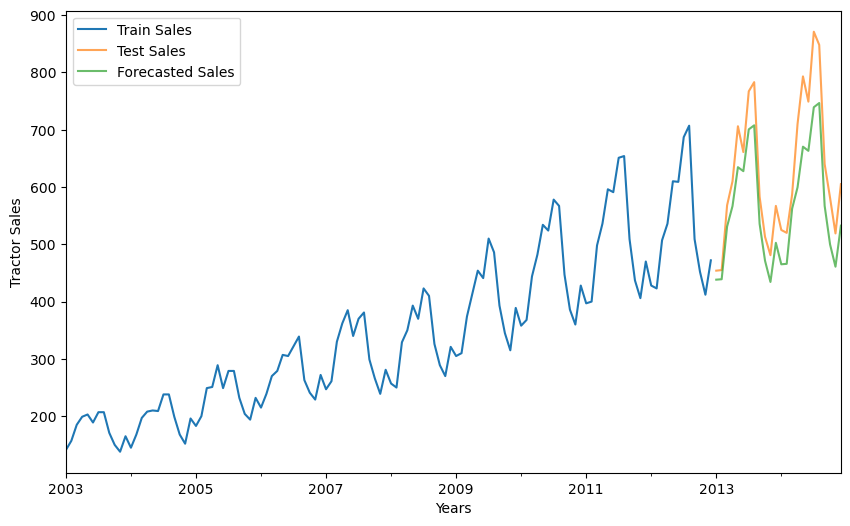

In [44]:
axis = train['Tractor-Sales'].plot(label='Train Sales', figsize=(10, 6))
testCopy['Tractor-Sales'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()
plt.close()

### Forecast sales using the best fit ARIMA model

In [45]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [46]:
n_steps = 36
idx = pd.date_range(data.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2014-12-01,438.280145,406.859489,472.127334,406.859489,472.127334
2015-01-01,439.028001,400.763734,480.945679,400.763734,480.945679
2015-02-01,531.045844,477.948351,590.042182,477.948351,590.042182
2015-03-01,566.659964,503.683300,637.510743,503.683300,637.510743
2015-04-01,634.582802,557.737481,722.015906,557.737481,722.015906


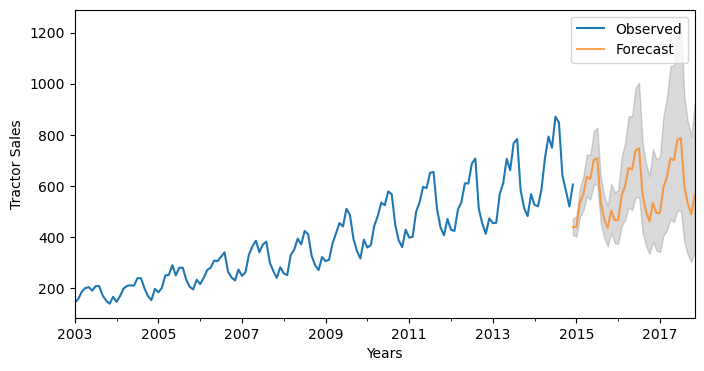

In [47]:
# plot the forecast along with the confidence band

axis = sales_ts.plot(label='Observed', figsize=(8, 4))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.15)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

### Plot ACF and PACF for residuals of ARIMA model to ensure no more information is left for extraction

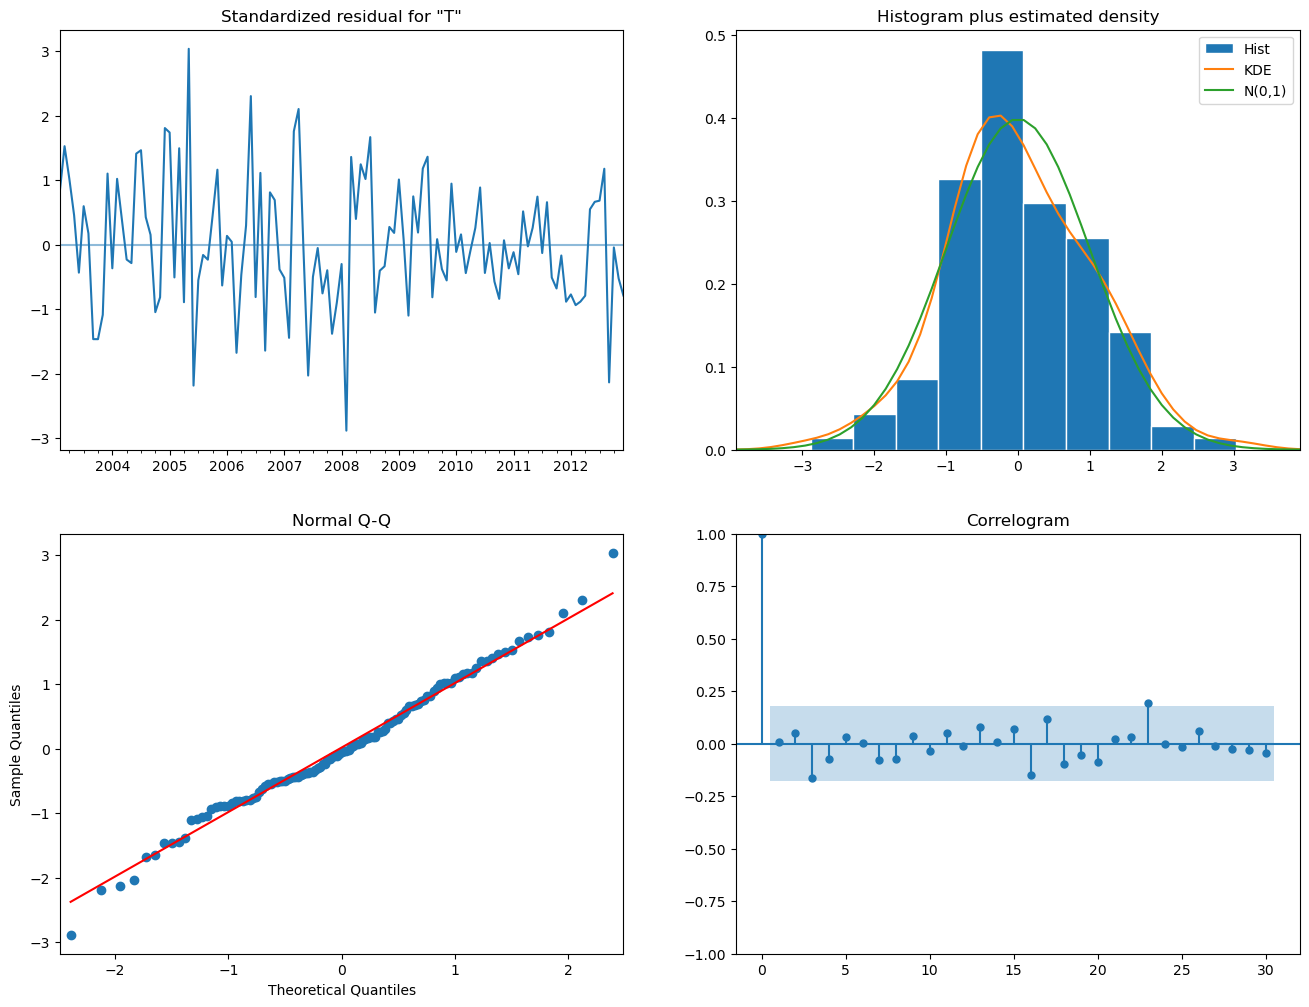

In [48]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

### Inference

We need to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If it is not that it signifies that the model can be further improved and we repeat the process with the residuals.

In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:

1. The KDE plot of the residuals on the top right is almost similar with the normal distribution.
2. The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.
3. The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

Those observations coupled with the fact that there are no spikes outside the insignificant zone for both ACF and PACF plots lead us to conclude that that residuals are random with no information or juice in them and our model produces a satisfactory fit that could help us understand our time series data and forecast future values. It sems that our ARIMA model is working fine.

### Practice Exercise 1

Use US Airpassengers data set and redo the example 3.

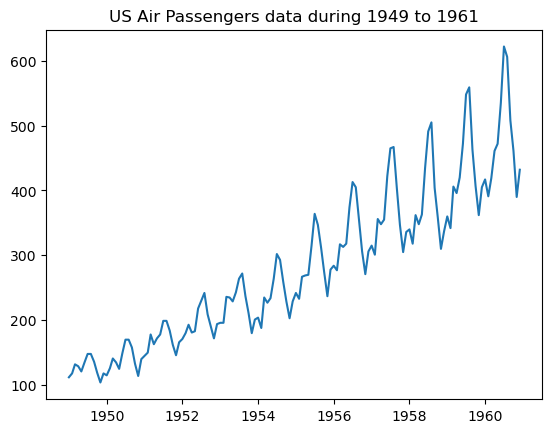

In [52]:
from     pandas            import  read_csv, DataFrame, concat, Grouper
import   pandas            as      pd
import   matplotlib.pyplot as      plt
%matplotlib inline

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

data      =   pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month', date_parser = dateparse)
plt.plot(data) 
plt.title('US Air Passengers data during 1949 to 1961')
plt.show()

### Take home exercise 1

Use shampoo sales data *shampoo-sales.csv* and find the best fit of ARIMA using the auto ARIMA concepts explained in Example 3.

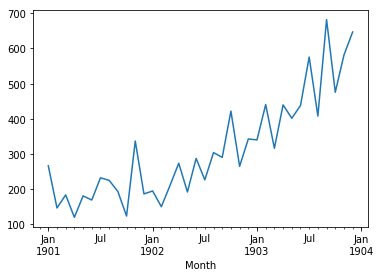

In [51]:
import  pandas            as pd
import  matplotlib.pyplot as plt
 
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('./data/shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

series.plot()
plt.show()

### END